In [ ]:
#Mengimpor library yang diperlukan

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
#Mengimpor dataset

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('diabetes_indonesia.csv')
df.head()

Saving diabetes_indonesia.csv to diabetes_indonesia.csv


,Kehamilan,Glukosa,TekananDarah,KetebalanKulit,Insulin,IndeksMassaTubuh,FungsiRiwayatDiabetes,Usia,Hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Menampilkan informasi dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kehamilan              768 non-null    int64  
 1   Glukosa                768 non-null    int64  
 2   TekananDarah           768 non-null    int64  
 3   KetebalanKulit         768 non-null    int64  
 4   Insulin                768 non-null    int64  
 5   IndeksMassaTubuh       768 non-null    float64
 6   FungsiRiwayatDiabetes  768 non-null    float64
 7   Usia                   768 non-null    int64  
 8   Hasil                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Menunjukkan rangkuman statistik dari dataset

df.describe()

,Kehamilan,Glukosa,TekananDarah,KetebalanKulit,Insulin,IndeksMassaTubuh,FungsiRiwayatDiabetes,Usia,Hasil
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Memeriksa nilai kosong

df.isnull().values.any()

False

In [ ]:
#Membagi dataset ke data training dan data tes
"""
Mengatur variabel independen (x) dan dependen (y) dengan mengambilnya dari dataset dan menggunakan 
fungsi scikit-learn train_test_split untuk membagi data menjadi data testing
dan data training.
"""

X = df[['Kehamilan','Glukosa','TekananDarah','KetebalanKulit','Insulin','IndeksMassaTubuh','FungsiRiwayatDiabetes','Usia']]
y = df['Hasil']

"""
Nilai 0.25 mengartikan bahwa kita menggunakan 25% dari dataset untuk testing.
Random_state memastikan reproduktivitas. Untuk output train_test_split, kita
mendapatkan nilai x_train, x_test, y_train, dan y_test.
"""

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#Menerapkan model LogisticRegression()

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


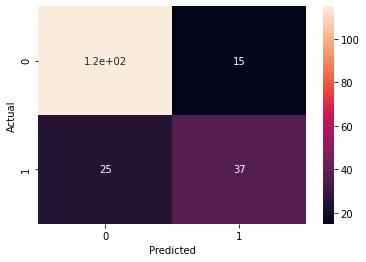

In [ ]:
#Setelah LogisticRegression model diterapkan, kita dapat melihat hasil akurasi model menggunakan accuracy_score dan confusion_matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
#Akurasi skor

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.7916666666666666


In [ ]:
#Menampilkan nilai precision, recall, dan f-measure dari model LogisticRegression menggunakan dataset diabetes

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.71      0.60      0.65        62

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192



In [ ]:
print (X_test) #test dataset
print (y_pred) #predicted values

     Kehamilan  Glukosa  ...  FungsiRiwayatDiabetes  Usia
661          1      199  ...                  1.394    22
122          2      107  ...                  0.404    23
113          4       76  ...                  0.391    25
14           5      166  ...                  0.587    51
529          0      111  ...                  0.660    31
..         ...      ...  ...                    ...   ...
366          6      124  ...                  0.368    29
301          2      144  ...                  0.422    25
382          1      109  ...                  0.947    21
140          3      128  ...                  0.268    55
463          5       88  ...                  0.258    37

[192 rows x 8 columns]
[1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 